# Pymaceuticals Inc.
---

### Analysis

- Throughout the cleaning and sorting of the data, we can see that out of all these medications, Capomulin and Ramicane reduces the size of the tumor more overall. 

- This data may be flawed, as we can see those drugs are tested at a higher frequecny than all of the other drugs in the study. Furthermore, we can see that there is a positive correlatiom between the weight of the rat, and the size of the tumor. This could tell us that the drugs lack efficiency as it fails to reduce the size of tumors for all sizes of rats. 
 

In [178]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [179]:
# Checking the number of mice.
mice_count = len(data_df["Mouse ID"].value_counts())
mice_count

249

In [180]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = data_df.loc[data_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [181]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_df = data_df.loc[data_df["Mouse ID"] == "g989", :]
dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [182]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = data_df[data_df['Mouse ID'].isin(duplicate_mice)==False]
clean_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [183]:
# Checking the number of mice in the clean DataFrame.
mice_count_clean = len(clean_mouse_df["Mouse ID"].value_counts())
mice_count_clean

248

## Summary Statistics

In [184]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

regimen_mean = clean_mouse_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
regimen_median = clean_mouse_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
regimen_variance = clean_mouse_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
regimen_std = clean_mouse_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
regimen_sem = clean_mouse_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]

summary_regmien_df = pd.DataFrame({"Mean": regimen_mean, 
                                    "Median":regimen_median, 
                                    "Variance":regimen_variance, 
                                    "Std. Dev.": regimen_std, 
                                    "Std. Err.": regimen_sem})

summary_regmien_df

/var/folders/kr/rf7rhds12g1dhglkgtrbcpd80000gn/T/ipykernel_38755/1081721056.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  regimen_mean = clean_mouse_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
/var/folders/kr/rf7rhds12g1dhglkgtrbcpd80000gn/T/ipykernel_38755/1081721056.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  regimen_median = clean_mouse_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
/var/folders/kr/rf7rhds12g1dhglkgtrbcpd80000gn/T/ipykernel_38755/1081721056.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future vers

,Mean,Median,Variance,Std. Dev.,Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [185]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregate_summary = clean_mouse_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
aggregate_summary = aggregate_summary.rename(columns={"mean":"Mean",
                                                      "median":"Median",
                                                      "var":"Variance",
                                                      "std":"Std. Dev.",
                                                      "sem":"Std. Err."
                                                     })
aggregate_summary

,Mean,Median,Variance,Std. Dev.,Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

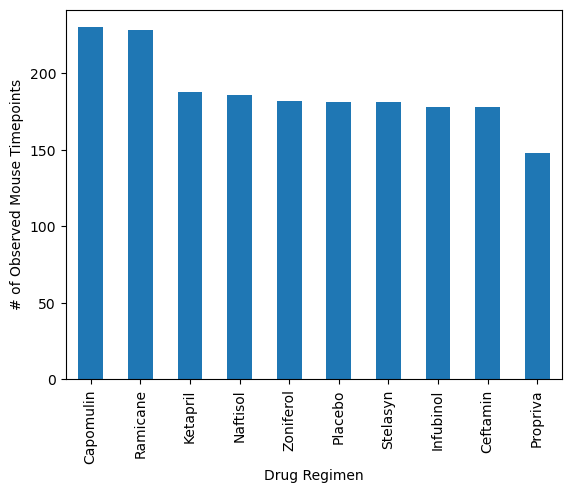

In [186]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count_bar = clean_mouse_df["Drug Regimen"].value_counts()

plot_pandas = mice_count_bar.plot.bar()  

# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()

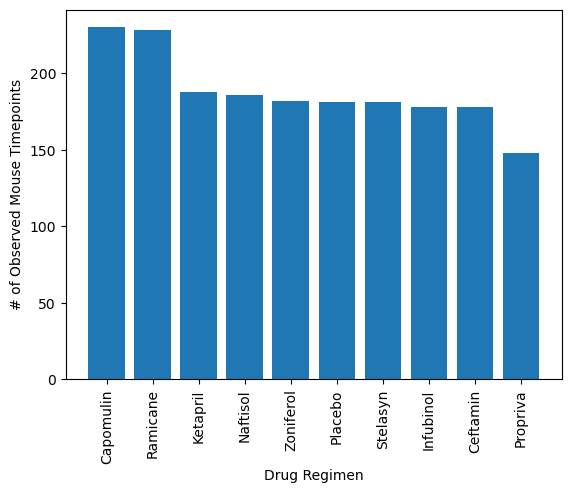

In [187]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count_bar.index.values
y_axis = mice_count_bar.values

plt.bar(x_axis, y_axis, align='center')

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")

plt.show()

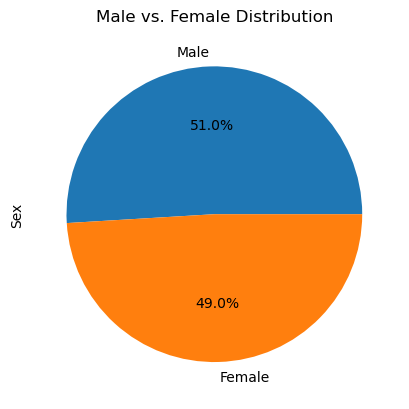

In [188]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_mouse_df["Sex"].value_counts()
gender_data.plot.pie(autopct='%1.1f%%', title="Male vs. Female Distribution")
plt.show()

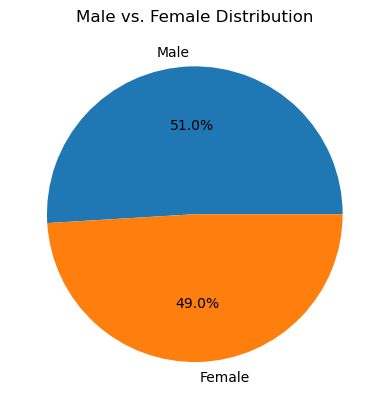

In [189]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_data_2 = clean_mouse_df["Sex"].value_counts()

# Tell matplotlib to create a pie chart filled with corresponding percentages and displayed vertically
plt.pie(gender_data_2, labels=gender_data_2.index.values, autopct="%1.1f%%")
plt.title("Male vs. Female Distribution")

# Display resulting plot
plt.show()

## Quartiles, Outliers and Boxplots

In [190]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = pd.DataFrame(data_df.groupby("Mouse ID")["Timepoint"].max().sort_values()).reset_index()
max_timepoint_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_timepoint_df = pd.merge(data_df, max_timepoint_df, on="Mouse ID")
merged_timepoint_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [191]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
total_tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = merged_timepoint_df.loc[merged_timepoint_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    total_tumor_vol.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"For {drug}, the outliers are: {outliers}")

For Capomulin, the outliers are: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
For Ramicane, the outliers are: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64
For Infubinol, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Ceftamin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


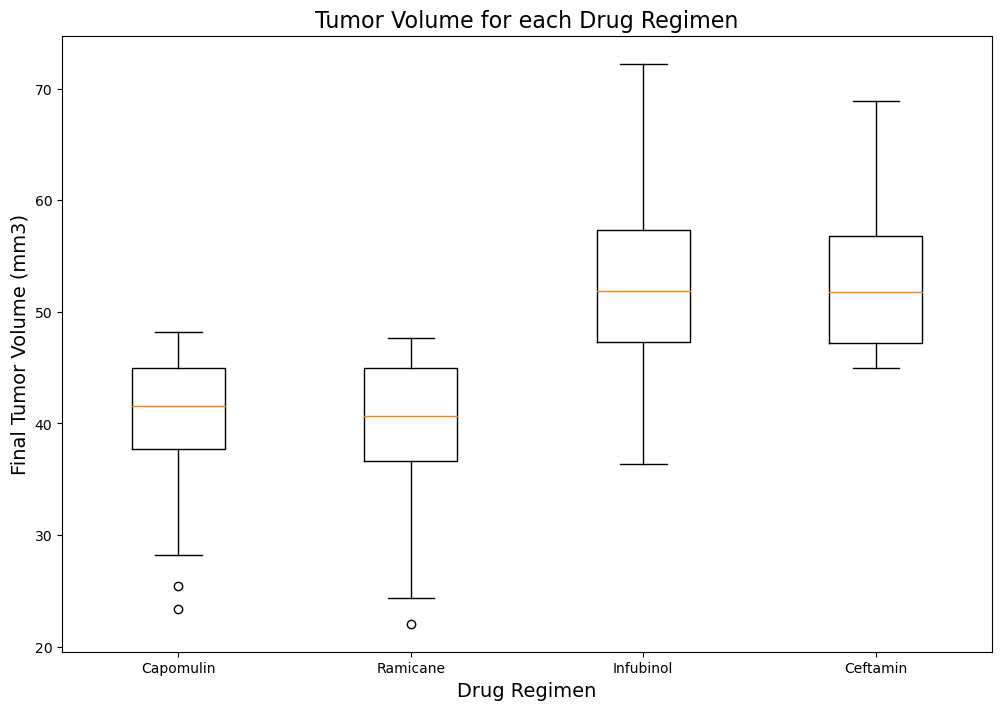

In [192]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.set_title("Tumor Volume for each Drug Regimen",fontsize =16)
ax1.set_ylabel("Final Tumor Volume (mm3)",fontsize = 14)
ax1.set_xlabel("Drug Regimen",fontsize = 14)
ax1.boxplot(total_tumor_vol, labels=treatments, widths = 0.4,vert=True)

plt.show()

## Line and Scatter Plots

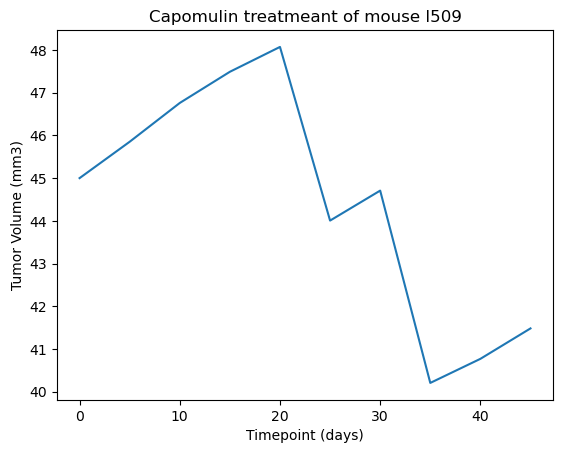

In [193]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Capomulin",:]

line_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
line_df.head()
x_axis = line_df["Timepoint"]
tumsiz = line_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumsiz, label="Fahreneit")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

/var/folders/kr/rf7rhds12g1dhglkgtrbcpd80000gn/T/ipykernel_38755/3490879610.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_capm_vol =Capomulin_df.groupby(["Mouse ID"]).mean()


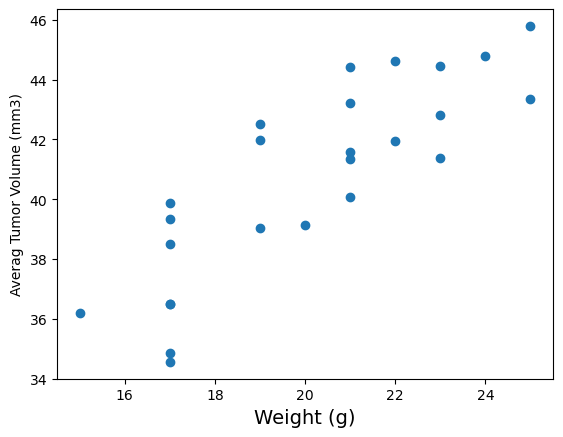

In [196]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

fig1, ax1 = plt.subplots()
avg_capm_vol =Capomulin_df.groupby(["Mouse ID"]).mean()

marker_size=15
plt.scatter(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)",fontsize =14)
plt.ylabel("Averag Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [198]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
